# Imports

In [1]:
from sklearnex import patch_sklearn # Otimizar sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# Balancear dados
from imblearn.over_sampling import SMOTE

# Obter uma representação vetorial a partir de um texto
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Redução de dimensionalidade
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [3]:
from wordcloud import WordCloud
from string import punctuation
from nltk.corpus import stopwords

import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados

In [4]:
sm = SMOTE()

In [5]:
STOPWORDS = stopwords.words('english')
STOPWORDS.extend(punctuation)

In [6]:
dataset = 'topic_classifier.csv'

df_dados = pd.read_csv(dataset)
df_dados = df_dados.sample(frac=1)
df_dados['title'] = df_dados['title'].apply(str)
df_dados['c1body'] = df_dados['c1body'].apply(str)
df_dados

,title,c1body,Topic
3790,Pseudonymization vs. Encryption: Fight! (an IS...,[link] [comments],Independence
5250,Great Edit and Great Tits [Reveal],[link] [comments],Entertainment
3342,Stack Overflow Podcast - Episode #82,Stack Overflow Podcast - Episode #82 by The St...,Software Development
965,How TCP Connections Work,₿💰💵💲Help Support the Channel by Donating Crypt...,Independence
1691,14 Open Datasets for Text Classification in Ma...,Text classification datasets are used to categ...,Machine Learning
...,...,...,...
702,Welcome to the Microsoft PhD Summit 2020 & Fir...,"Day 1 | December 1, 2020 Neel Joshi, Principal...",Machine Learning
765,Spotify's Big Bet Not Working Out...?,Clip from Lew Later (You May Have Lost Your Fa...,News
1308,Sarga18 (Ravana Enters Ashoka Vatika) - Sundar...,Downloadable Resources(Sarga18): 🔊MP3 - Narrat...,Sprituality
409,The Oiling of America,"Enjoy the videos and music you love, upload or...",Independence


In [7]:
def show_wordcloud(wordlist, filter_stopwords=False):
	data = ' '.join(map(str, wordlist))
	wc = WordCloud(
		stopwords=STOPWORDS if filter_stopwords else [],
		background_color='white',
		width=800,
		height=800,
	).generate_from_text(data)

	plt.figure(figsize=(15, 15))
	plt.imshow(wc)
	plt.axis('off')
	plt.tight_layout()
	plt.show()

# Visualizações

In [8]:
colors = {
	'Entertainment': 'red',
	'Independence': 'orange',
	'Machine Learning': 'green',
	'News': 'blue',
	'Science': 'purple',
	'Software Development': 'brown',
	'Sprituality': 'gray',
	'Wellness': 'cyan'
}

## Dados padrões

Entertainment           2028
News                    1106
Sprituality              678
Machine Learning         663
Software Development     580
Independence             392
Science                  318
Wellness                 106
Name: Topic, dtype: int64


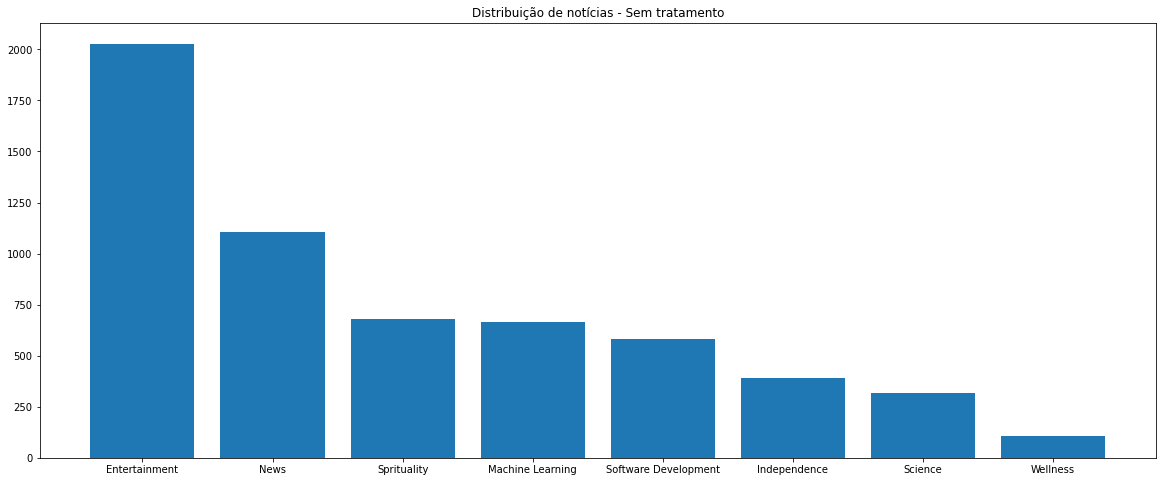

In [9]:
default_topics = df_dados['Topic'].value_counts()
print(default_topics)
plt.figure(figsize=(20, 8))
plt.bar(default_topics.keys(), default_topics.values)
plt.title("Distribuição de notícias - Sem tratamento")
plt.show()
# Reduzir o entertainment

Wordcloud - Sem tratamento - Com stopwords


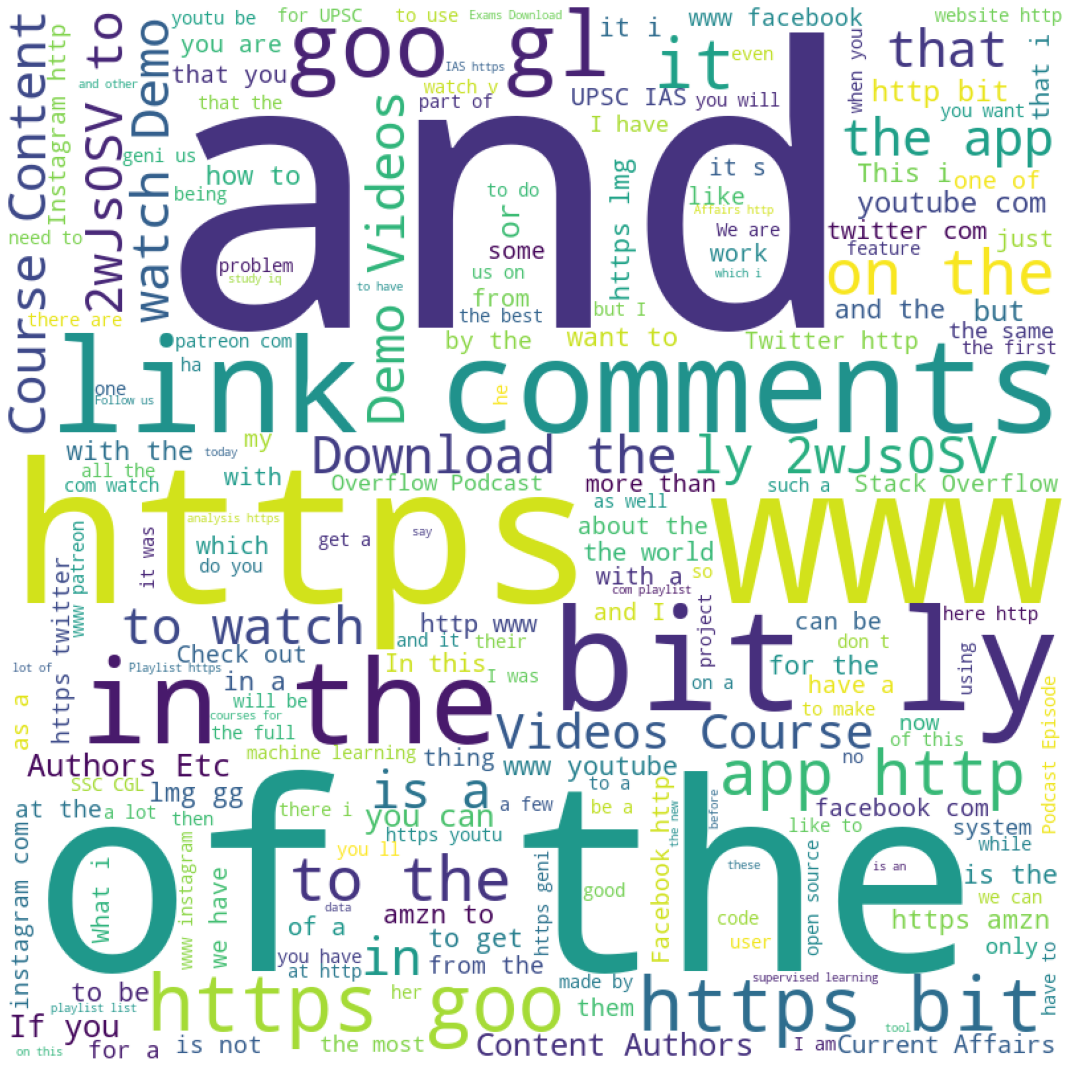

In [10]:
print('Wordcloud - Sem tratamento - Com stopwords')
show_wordcloud(df_dados['title'] + df_dados['c1body'], filter_stopwords=False)

Wordcloud - Sem tratamento - Sem stopwords


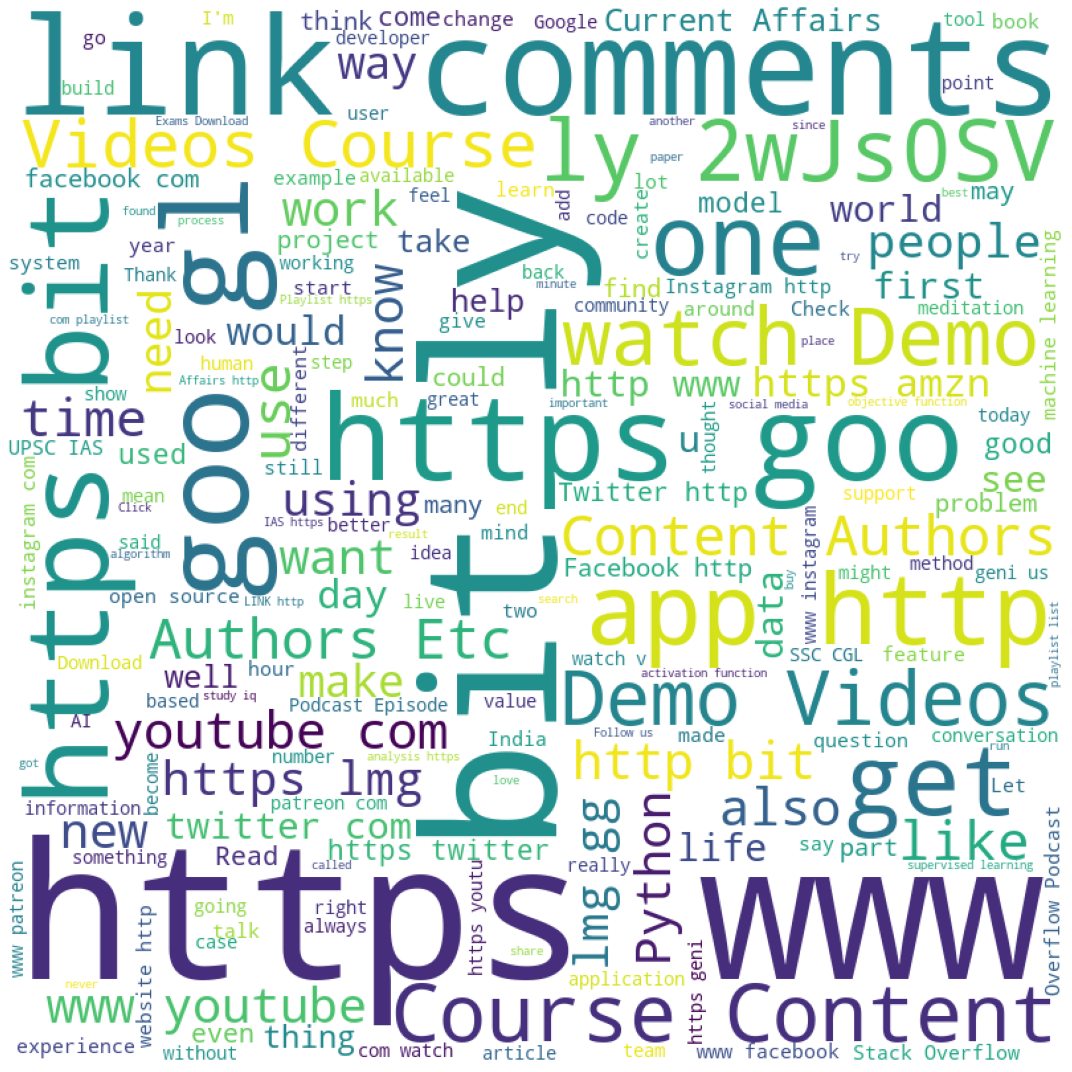

In [11]:
print('Wordcloud - Sem tratamento - Sem stopwords')
show_wordcloud(df_dados['title'] + df_dados['c1body'], filter_stopwords=True)

## Dados após ajustar distribuição com SMOTE

### Reduzir maiores colunas de dados para terceiro maior e depois usar SMOTE

In [12]:
entertainment = df_dados[df_dados['Topic'] == 'Entertainment'].iloc(axis=0)[:678]
news = df_dados[df_dados['Topic'] == 'News'].iloc(axis=0)[:678]
df_dados_2 = df_dados[df_dados['Topic'] != 'Entertainment']
df_dados_2 = df_dados_2[df_dados_2['Topic'] != 'News']
df_dados_2 = pd.concat([df_dados_2, news, entertainment])

### TFIDF

In [13]:
vectorizer = TfidfVectorizer(
  stop_words=STOPWORDS,
	lowercase=True
)

def TFIDF(word_list):
  try:
    tfidf = vectorizer.fit_transform(word_list.apply(str))
  except:
    tfidf = vectorizer.fit_transform(word_list)

  df_tfidf = pd.DataFrame(
    tfidf.toarray(),
    columns=vectorizer.get_feature_names()
  )

  return df_tfidf

In [14]:
result_smote_tfidf = sm.fit_resample(
	TFIDF(df_dados_2['title'] + df_dados_2['c1body']),
	df_dados_2['Topic']
)
df_smote_tfidf = pd.concat([*result_smote_tfidf], axis=1)
df_smote_tfidf

,00,000,000000,0001,00029890,00072,001,0014,00152,00206,...,ರಮ,ವಭ,ಷಯಗಳ,ಸಮ,ಸಹ,ಹರ,ﬁxed,𝙎𝙝𝙖𝙣𝙠𝙖𝙧𝙖𝙘𝙝𝙖𝙧𝙮𝙖,𝙏𝙚𝙢𝙥𝙡𝙚,Topic
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Independence
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Software Development
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Independence
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Machine Learning
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5419,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wellness
5420,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wellness
5421,0.018184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wellness
5422,0.009018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wellness


In [24]:
df_smote_tfidf.to_feather(path='./tfidf_smote.feather')

Independence            678
Software Development    678
Machine Learning        678
Science                 678
Sprituality             678
Wellness                678
News                    678
Entertainment           678
Name: Topic, dtype: int64


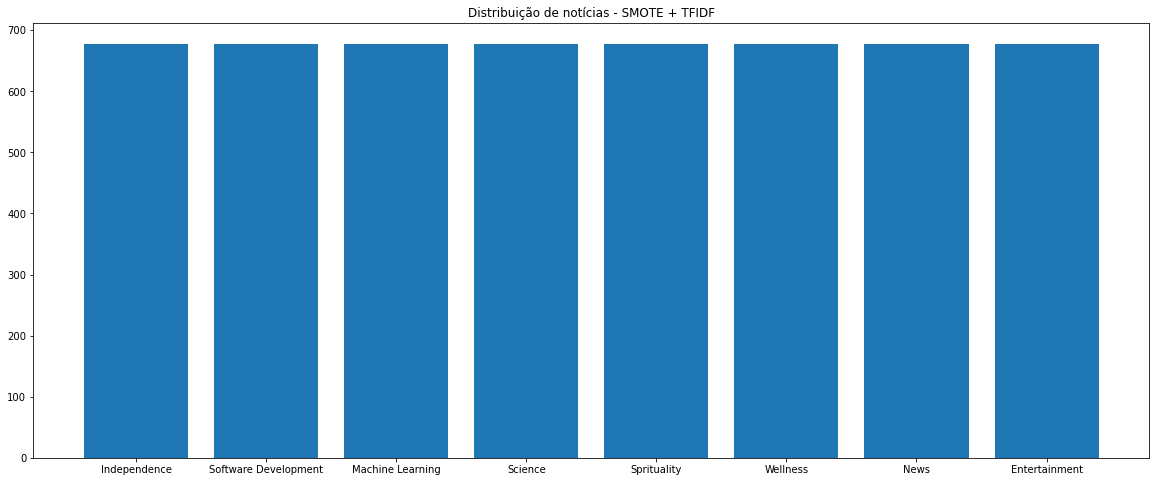

In [26]:
smote_tfidf_topics = df_smote_tfidf['Topic'].value_counts()
print(smote_tfidf_topics)
plt.figure(figsize=(20, 8))
plt.bar(smote_tfidf_topics.keys(), smote_tfidf_topics.values)
plt.title("Distribuição de notícias - SMOTE + TFIDF")
plt.show()

### Bag of Words

In [31]:
count_vectorizer = CountVectorizer(
	lowercase=True, 
)

def BAG_OF_WORDS(word_list: pd.Series):
	try:
		bag = count_vectorizer.fit_transform(word_list.apply(str))
	except:
		bag = count_vectorizer.fit_transform(word_list)

	df_bag = pd.DataFrame(bag.toarray(), columns=count_vectorizer.get_feature_names())
	return df_bag

In [32]:
result_smote_bow = sm.fit_resample(
	BAG_OF_WORDS(df_dados_2['title'] + df_dados_2['c1body']),
	df_dados_2['Topic']
)
df_smote_bow = pd.concat([*result_smote_bow], axis=1)
df_smote_bow

,00,000,000000,0001,00029890,00072,001,0014,00152,00206,...,ರಮ,ವಭ,ಷಯಗಳ,ಸಮ,ಸಹ,ಹರ,ﬁxed,𝙎𝙝𝙖𝙣𝙠𝙖𝙧𝙖𝙘𝙝𝙖𝙧𝙮𝙖,𝙏𝙚𝙢𝙥𝙡𝙚,Topic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Independence
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Software Development
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Independence
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Machine Learning
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5419,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Wellness
5420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Wellness
5421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Wellness
5422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Wellness


In [33]:
df_smote_bow.to_feather(path='./bow_smote.feather')

### Word2Vec

In [ ]:
def WORD_2_VEC(word_list: pd.Series):


In [ ]:
result_smote_w2v = sm.fit_resample(
	WORD_2_VEC(df_dados_2['title'] + df_dados_2['c1body']),
	df_dados_2['Topic']
)
df_smote_w2v = pd.concat([*result_smote_w2v], axis=1)
df_smote_w2v

### Bert

# Scatter

In [ ]:
def reducao_dimensionalidade(x):
	return TSNE(n_components=2, init='random', learning_rate='auto').fit_transform(x)
	return PCA(n_components=2).fit_transform(x)

In [ ]:
plt.figure(figsize=(15, 8))

for topic in colors:
	print(topic)

	data = df_smote_tfidf[df_smote_tfidf['Topic'] == topic].drop(columns='Topic')
	dados_reducao_dimensionalidade = reducao_dimensionalidade(data)

	plt.scatter(
		[y[0] for y in dados_reducao_dimensionalidade],
		[y[1] for y in dados_reducao_dimensionalidade],
		color=colors[topic],
		alpha=0.5,
		label=topic
	)

plt.show()


Entertainment


KeyboardInterrupt: 

<Figure size 1080x576 with 0 Axes>